In [1]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

Automatically created module for IPython interactive environment


In [10]:
np.random.seed(0)
X = np.r_[np.random.randn(10, 2) + [1, 1], np.random.randn(10, 2)]
y = [1] * 10 + [-1] * 10

In [16]:
sample_weight = 100 * np.abs(np.random.randn(20))
sample_weight[:10] *= 10

In [17]:
xx, yy = np.meshgrid(np.linspace(-4, 5, 500), np.linspace(-4, 5, 500))
plt.figure()

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=sample_weight, alpha=0.9,
            cmap=plt.cm.bone)

In [19]:
clf = linear_model.SGDClassifier(alpha=0.01, n_iter=100)
clf.fit(X, y)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
no_weights = plt.contour(xx, yy, Z, levels=[0], linestyles=['solid'])

## fit the weighted model
clf = linear_model.SGDClassifier(alpha=0.01, n_iter=100)
clf.fit(X, y, sample_weight=sample_weight)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
samples_weights = plt.contour(xx, yy, Z, levels=[0], linestyles=['dashed'])


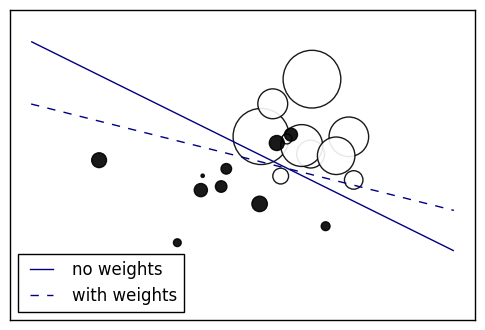

In [20]:

plt.legend([no_weights.collections[0], samples_weights.collections[0]],
           ["no weights", "with weights"], loc="lower left")

plt.xticks(())
plt.yticks(())
plt.show()